In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1.parasite_axes import HostAxes

In [2]:
obs = [
    ["01_S1", 3.88, 0.14, 1970, 63],
    ["01_S4", 5.6, 0.82, 1622, 150],
    ["02_S1", 2.4, 0.54, 1570, 40],
    ["03_S1", 4.1, 0.62, 2380, 170],
]

# angular proper motion("/yr) to linear velocity(km/s) at distance=2.3kpc
pm_to_kms = 1.0 / 206265.0 * 2300 * 3.085e18 / 3.15e7 / 1.e5

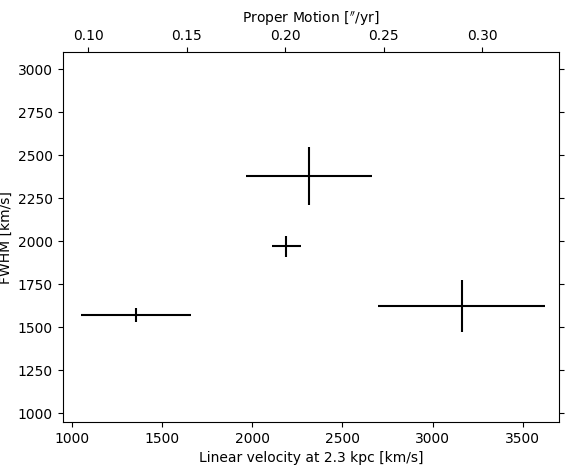

In [3]:
fig = plt.figure()

ax_kms = fig.add_subplot(axes_class=HostAxes, aspect=1)
aux_trans = mtransforms.Affine2D().scale(pm_to_kms, 1.0)
ax_pm = ax_kms.twin(aux_trans)

for n, ds, dse, w, we in obs:
    time = ((2007 + (10.0 + 4 / 30.0)/12) - 1988.5)
    v = ds / time * pm_to_kms
    ve = dse / time * pm_to_kms
    ax_kms.errorbar([v], [w], xerr=[ve], yerr=[we], color="k")

ax_kms.axis["bottom"].set_label("Linear velocity at 2.3 kpc [km/s]")
ax_kms.axis["left"].set_label("FWHM [km/s]")
ax_pm.axis["top"].set_label(r"Proper Motion [$''$/yr]")
ax_pm.axis["top"].label.set_visible(True)
ax_pm.axis["right"].major_ticklabels.set_visible(False)

ax_kms.set_xlim(950, 3700)
ax_kms.set_ylim(950, 3100)
# xlim and ylim of ax_pms will be automatically adjusted.

plt.show()